<a href="https://colab.research.google.com/github/LightAnge/AntiMesh/blob/main/vFinal_image_seq_to_location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM vs GRU vs CNN neural network for :
# noisy sequence images => location camera

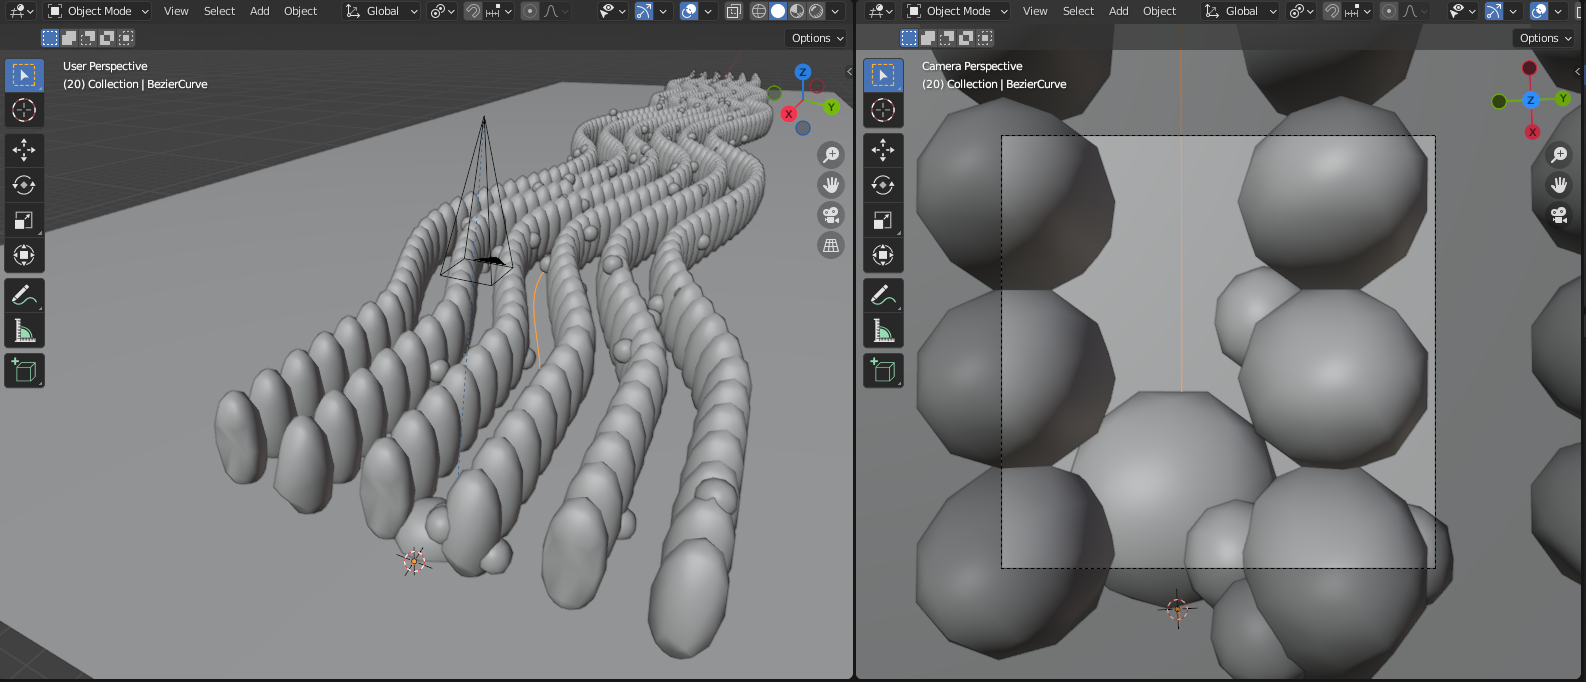

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.experimental.numpy as tnp
import keras.layers as layers
from keras.layers.recurrent_v2 import LSTM
tnp.experimental_enable_numpy_behavior()

Load data :

In [ ]:
img_height = 64
img_width = 64
dataset_size = 8192

test_split = int(dataset_size/4*0.75)
dataset = np.load(open("/content/drive/MyDrive/ia_compute/dataset_final/dataset_seq_4_64_bw_parti_big.npz",'rb'),allow_pickle=True)
dataset_4 = (
    dataset["image"][:test_split],
    dataset["image"][test_split:],
    dataset["label"][:test_split],
    dataset["label"][test_split:]
)

test_split = int(dataset_size/8*0.75)
dataset = np.load(open("/content/drive/MyDrive/ia_compute/dataset_final/dataset_seq_8_64_bw_parti_big.npz",'rb'),allow_pickle=True)
dataset_8 =(
    dataset["image"][:test_split],
    dataset["image"][test_split:],
    dataset["label"][:test_split],
    dataset["label"][test_split:]
)

test_split = int(dataset_size/16*0.75)
dataset = np.load(open("/content/drive/MyDrive/ia_compute/dataset_final/dataset_seq_16_64_bw_parti_big.npz",'rb'),allow_pickle=True)
dataset_16 = (
    dataset["image"][:test_split],
    dataset["image"][test_split:],
    dataset["label"][:test_split],
    dataset["label"][test_split:]
)

test_split = int(dataset_size/32*0.75)
dataset = np.load( open("/content/drive/MyDrive/ia_compute/dataset_final/dataset_seq_32_64_bw_parti_big.npz",'rb'),allow_pickle=True)
dataset_32 = (
    dataset["image"][:test_split],
    dataset["image"][test_split:],
    dataset["label"][:test_split],
    dataset["label"][test_split:]
)

del dataset

Visualize dataset :

(768, 8, 64, 64)
(768, 1)


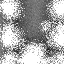

[-0.15477413]


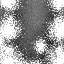

[0.26336908]


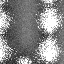

[-0.07396686]


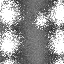

[0.3755523]


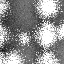

[0.27228332]


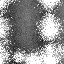

[0.02983439]


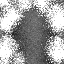

[-0.16339862]


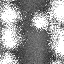

[0.11837697]


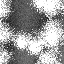

[-0.12723994]


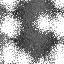

[0.19693732]
robot mouvement :


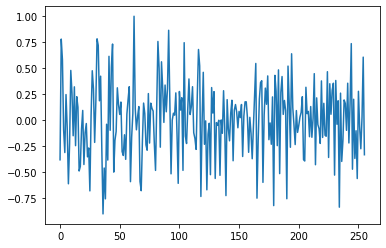

In [ ]:
print(dataset_8[0].shape)
print(dataset_8[2].shape)
#dataset_8["image"][batch_size][sequence_length][x][z]
for i in range(10):
  display(PIL.Image.fromarray(np.uint8(dataset_8[0][i][0]),mode="L"))
  print(dataset_8[2][i])
plt.figure(700)
print("robot mouvement :")
plt.plot(dataset_8[3])

Define model (LSTM,GRU,CNN) : 

In [ ]:

def model_LSTM(seq_length):
  model_LSTM = Sequential([

    layers.Rescaling(1./255, input_shape=(seq_length,img_height, img_width)),
    layers.Reshape((seq_length,64,64,1),input_shape=(seq_length,64,64)),
    layers.Conv2D(1, (3, 3), strides=2, activation="relu", padding="same",input_shape=(img_height,img_width,)),
    layers.Conv2D(1, (3, 3), strides=2, activation="relu", padding="same",input_shape=(img_height,img_width,)),
    layers.Reshape((16,16,seq_length),input_shape=(seq_length,16,16,1)),
    layers.MaxPooling2D(),
    layers.Reshape((seq_length,64),input_shape=(8,8,seq_length)),

    layers.LSTM(16),

    layers.Dense(16),
    layers.Dense(1),#, activation='relu'),
  ])
  model_LSTM.compile(optimizer='adam',
                loss="mean_squared_error",
                metrics=['accuracy'])
  return model_LSTM
model_LSTM(4).summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_15 (Rescaling)    (None, 4, 64, 64)         0         
                                                                 
 reshape_40 (Reshape)        (None, 4, 64, 64, 1)      0         
                                                                 
 conv2d_30 (Conv2D)          (None, 4, 32, 32, 1)      10        
                                                                 
 conv2d_31 (Conv2D)          (None, 4, 16, 16, 1)      10        
                                                                 
 reshape_41 (Reshape)        (None, 16, 16, 4)         0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                     

In [ ]:

def model_GRU(seq_length):
  model_GRU = Sequential([
    layers.Rescaling(1./255, input_shape=(seq_length,img_height, img_width)),
    layers.Reshape((seq_length,64,64,1),input_shape=(seq_length,64,64)),
    layers.Conv2D(1, (3, 3), strides=2, activation="relu", padding="same",input_shape=(img_height,img_width,)),
    layers.Conv2D(1, (3, 3), strides=2, activation="relu", padding="same",input_shape=(img_height,img_width,)),
    layers.Reshape((16,16,seq_length),input_shape=(seq_length,16,16,1)),
    layers.MaxPooling2D(),
    layers.Reshape((seq_length,64),input_shape=(8,8,seq_length)),

    layers.GRU(16),

    layers.Dense(16),
    layers.Dense(1),#, activation='relu'),
  ])

  model_GRU.compile(optimizer='adam',
                loss="mean_squared_error",
                metrics=['accuracy'])
  return model_GRU
model_GRU(4).summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 4, 64, 64)         0         
                                                                 
 reshape_43 (Reshape)        (None, 4, 64, 64, 1)      0         
                                                                 
 conv2d_32 (Conv2D)          (None, 4, 32, 32, 1)      10        
                                                                 
 conv2d_33 (Conv2D)          (None, 4, 16, 16, 1)      10        
                                                                 
 reshape_44 (Reshape)        (None, 16, 16, 4)         0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                     

In [ ]:
def model_CNN(seq_length):
  model_CNN = Sequential([
    #layers.Reshape(),
    layers.Rescaling(1./255, input_shape=(seq_length,img_height, img_width)),
    layers.Reshape((seq_length,64,64,1),input_shape=(seq_length,64,64)),
    layers.Conv2D(1, (3, 3), strides=2, activation="relu", padding="same",input_shape=(img_height,img_width,)),
    layers.Conv2D(1, (3, 3), strides=2, activation="relu", padding="same",input_shape=(img_height,img_width,)),
    layers.Reshape((16,16,seq_length),input_shape=(seq_length,16,16,1)),
    layers.MaxPooling2D(),
    layers.Flatten(),

    layers.Dense(16),

    layers.Dense(1),#, activation='relu'),
  ])

  model_CNN.compile(optimizer='adam',
                loss="mean_squared_error",
                metrics=['accuracy'])
  return model_CNN
model_CNN(4).summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 4, 64, 64)         0         
                                                                 
 reshape_46 (Reshape)        (None, 4, 64, 64, 1)      0         
                                                                 
 conv2d_34 (Conv2D)          (None, 4, 32, 32, 1)      10        
                                                                 
 conv2d_35 (Conv2D)          (None, 4, 16, 16, 1)      10        
                                                                 
 reshape_47 (Reshape)        (None, 16, 16, 4)         0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 4)          0         
 g2D)                                                            
                                                     

Verify shape :

In [ ]:
print(dataset_4[0].shape)
print(dataset_4[1].shape)
print(dataset_4[2].shape)
print(dataset_4[3].shape)

(1536, 4, 64, 64)
(512, 4, 64, 64)
(1536, 1)
(512, 1)


# Define custom loss :
To evalute the output, we define :



```
custom_loss = MSE(output , predict_output) / variance(output)
error = MSE(output , predict_output)
custom_loss = 1 => error =~ variance => bad model
custom_loss = 0.1 => error =~ 10% variance => good model
```



Variance : https://en.wikipedia.org/wiki/Variance

In [ ]:
def custom_loss(dataset_input,model):
  (x_train,x_test,y_train,y_test) = dataset_input

  [loss, percent_error] = model.evaluate(x_train, y_train, verbose=0)
  percent_loss_train = (loss/np.var(y_train))

  [loss, percent_error] = model.evaluate(x_test, y_test, verbose=0)
  percent_loss_test = (loss/np.var(y_test))


  return (percent_loss_train,percent_loss_test)

Train and evalation of all models on all datasets :

eval of the model : 0--0
Train percent error : 0.187097
Test percent error : 0.241751
eval of the model : 0--1
Train percent error : 1.000026
Test percent error : 1.000527
eval of the model : 0--2
Train percent error : 0.496118
Test percent error : 0.680492
eval of the model : 1--0
Train percent error : 0.543362
Test percent error : 0.641384
eval of the model : 1--1
Train percent error : 0.778564
Test percent error : 0.777849
eval of the model : 1--2
Train percent error : 1.033678
Test percent error : 1.115021
eval of the model : 2--0
Train percent error : 0.659771
Test percent error : 0.756878
eval of the model : 2--1
Train percent error : 0.537305
Test percent error : 0.669827
eval of the model : 2--2
Train percent error : 1.000415
Test percent error : 1.025144
eval of the model : 3--0
Train percent error : 0.998993
Test percent error : 1.005161
eval of the model : 3--1
Train percent error : 0.747290
Test percent error : 0.870414
eval of the model : 3--2
Train percent error : 0.29498

'\nprint("######### LSTM ## 4")\neval_model(model_LSTM(4),dataset_4,compile_setting_default,"LSTM_seq_4_")\n\nprint("######### GRU  ## 4")\neval_model(model_LSTM(4),dataset_4,compile_setting_default,"GRU_seq_4_")\n\nprint("######### CNN ### 4")\neval_model(model_CNN(4),dataset_4,compile_setting_default,"CNN_seq_4_")\n\nprint("######### LSTM ## 16")\neval_model(model_LSTM(16),dataset_16,compile_setting_default,"LSTM_seq_16_")\n\nprint("######### GRU  ## 16")\neval_model(model_LSTM(16),dataset_16,compile_setting_default,"GRU_seq_16_")\n\nprint("######### CNN ### 16")\neval_model(model_CNN(16),dataset_16,compile_setting_default,"CNN_seq_16_")\n'

<Figure size 432x288 with 0 Axes>

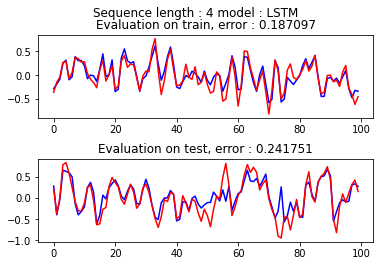

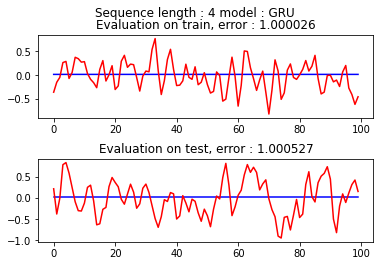

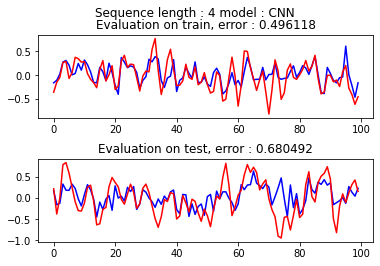

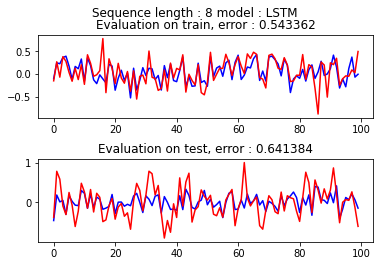

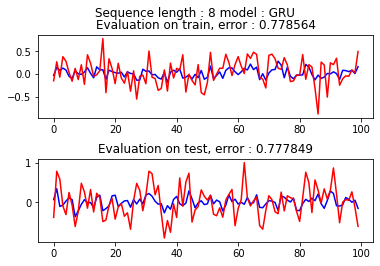

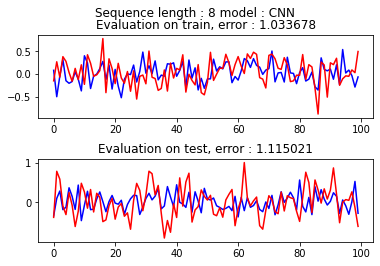

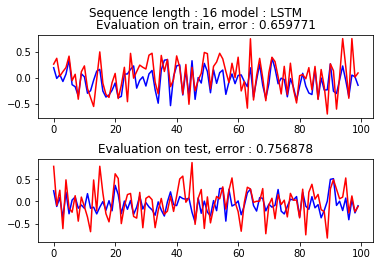

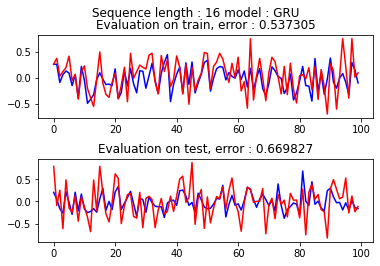

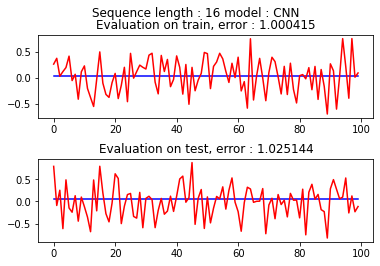

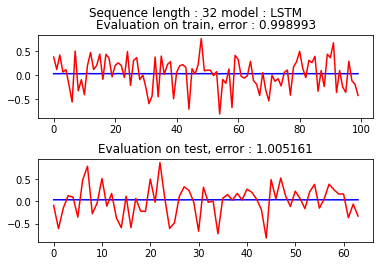

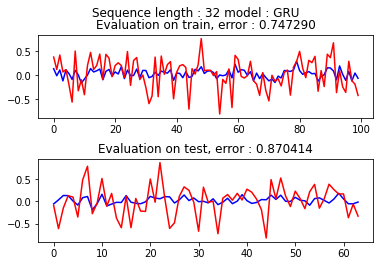

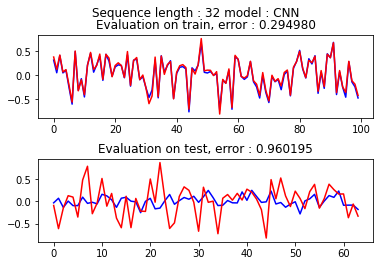

In [ ]:
plt_directory = "/content/drive/MyDrive/ia_compute/plot_folder/"
epoch_glob = 1
train_result = {
  "model_result":np.empty((4,3,10,2)),
  "train_loss":np.empty((4,3,epoch_glob)),
}

dataset_string = ['4','8','16','32']
model_string= ['LSTM','GRU','CNN']


fig_i=0
def eval_model(model_input,dataset_input,compile_setting,legend_title,a_data,b_method):
  print("eval of the model : "+str(a_data) + "--" + str(b_model))
  global train_result,fig_i,epoch_glob,dataset_string,model_string

  #train the dataset via the dataset
  (x_train,x_test,y_train,y_test) = dataset_input
  model = tf.keras.models.clone_model(model_input)

  model.compile(
      optimizer=compile_setting['optimizer'],
      loss=compile_setting['loss'],
      metrics=compile_setting['metrics']     
      )
  custom_loss_var = (0,0)
  for i in range(10):
    history = model.fit(
          x_train,
          y_train,
          epochs=epoch_glob,
          validation_split=0.2,
          verbose=0
          )
    custom_loss_var = custom_loss(dataset_input,model)
    train_result["model_result"][a_data][b_method][i] = custom_loss_var
  print("Train percent error : %f" % (custom_loss_var[0]))
  print("Test percent error : %f" % (custom_loss_var[1]))
  #store train history loss and percent_loss of the model/dataset
  for i in range(50):
    train_result["train_loss"][a_data][b_method]=history.history["loss"]
  


  
  #plot init
  plt.figure(fig_i)
  fig_i+=1
  fig, axs = plt.subplots(2)
  fig.tight_layout(pad=3.0, h_pad=2.0, w_pad=1.0)
  fig.suptitle("Sequence length : "+dataset_string[a_data] +" model : "+ model_string[b_method])
  #plot y_train/y_train_predict
  y_pred_evaluate = model.predict(x_train)
  axs[0].plot(y_pred_evaluate.T[0][:100],'-b', label='prediction')
  axs[0].plot(y_train.T[0][:100],'-r', label='data')
  axs[0].set_title('Evaluation on train, error : %f'  % train_result["model_result"][a_data][b_method][-1][0])
  #plot y_test/y_test_predict
  y_pred_evaluate = model.predict(x_test)
  axs[1].plot(y_pred_evaluate.T[0][:100],'-b', label='prediction')
  axs[1].plot(y_test.T[0][:100],'-r', label='data')
  axs[1].set_title('Evaluation on test, error : %f'  % train_result["model_result"][a_data][b_method][-1][1])

  plt.savefig(plt_directory+legend_title+"eval_.png")



compile_setting_default = {
    'optimizer':'adam',
    'loss':"mean_squared_error",
    'metrics':['accuracy']}



seq_lengh_loop=4
a_data=0
for d_data in [dataset_4,dataset_8,dataset_16,dataset_32]:

  b_model=0
  for m_model in [model_LSTM,model_GRU,model_CNN]:
    eval_model(m_model(seq_lengh_loop),d_data,compile_setting_default,"a =%i,b =%i,seq_length=%i" % (a_data,b_model,seq_lengh_loop),a_data,b_model)
    b_model+=1
  seq_lengh_loop=seq_lengh_loop*2
  a_data+=1

'''
print("######### LSTM ## 4")
eval_model(model_LSTM(4),dataset_4,compile_setting_default,"LSTM_seq_4_")

print("######### GRU  ## 4")
eval_model(model_LSTM(4),dataset_4,compile_setting_default,"GRU_seq_4_")

print("######### CNN ### 4")
eval_model(model_CNN(4),dataset_4,compile_setting_default,"CNN_seq_4_")

print("######### LSTM ## 16")
eval_model(model_LSTM(16),dataset_16,compile_setting_default,"LSTM_seq_16_")

print("######### GRU  ## 16")
eval_model(model_LSTM(16),dataset_16,compile_setting_default,"GRU_seq_16_")

print("######### CNN ### 16")
eval_model(model_CNN(16),dataset_16,compile_setting_default,"CNN_seq_16_")
'''



Plot train loss (best trainable model) :


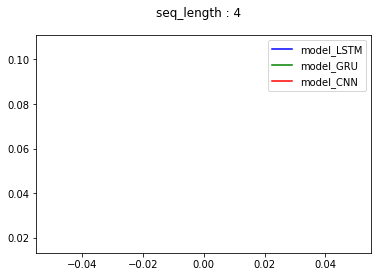

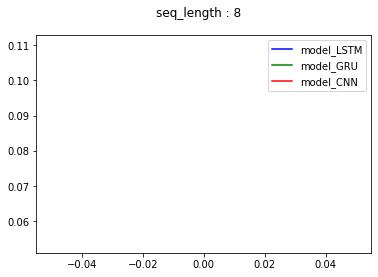

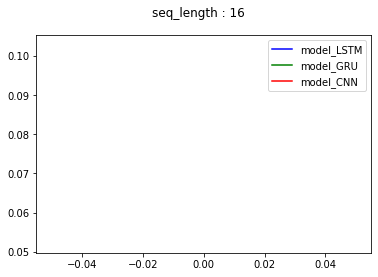

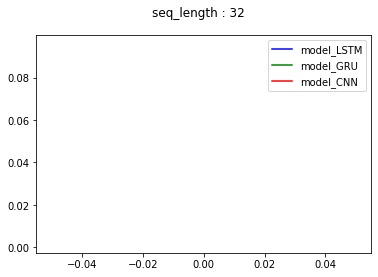

In [ ]:
plot_colors = ['b','g','r','c','m','y','k','w']

model_string= ['LSTM','GRU','CNN']
dataset_string = ['4','8','16','32']

plt_c=0

for i in range(train_result["train_loss"].shape[0]):#datatset (4,8,16,32)
  plt.figure(i)
  plt.suptitle("seq_length : "+dataset_string[i])
  for j in range(train_result["train_loss"].shape[1]):#algo (lstm,gru,cnn)
    #str(i)+'--'+str(j)
    plt.plot(train_result["train_loss"][i][j],plot_colors[j],label='model_'+model_string[j])
    
  plt_c+=1
  plt.legend()

The CNN is the best to overfit the train_sample with big long sequence

# Plot percent error on test batch (best prediction model result)

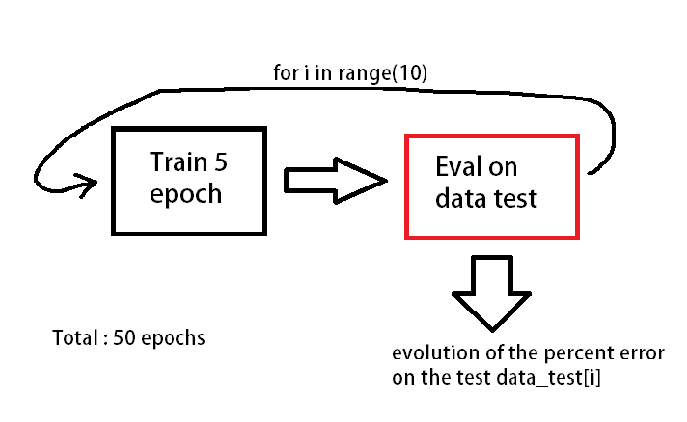

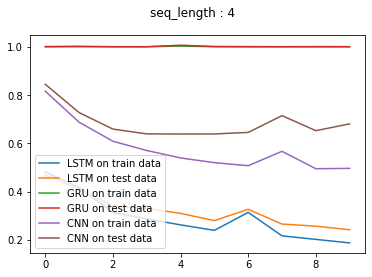

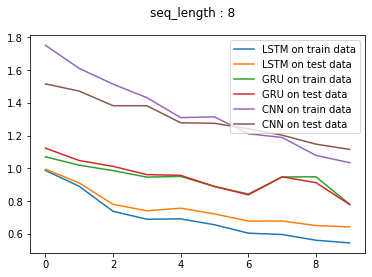

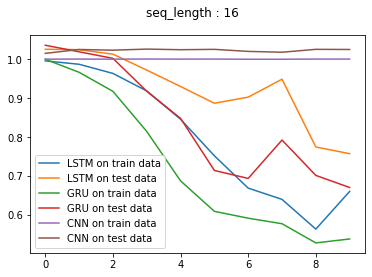

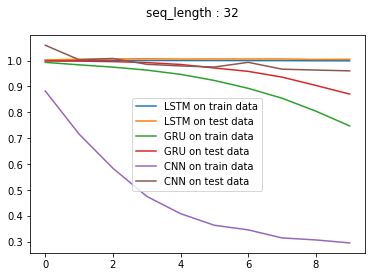

In [ ]:



plot_colors = ['b','g','r','c','m','y','k','w']
model_string= ['LSTM','GRU','CNN']
dataset_string = ['4','8','16','32']



for i in range(train_result["model_result"].shape[0]):#datatset (4,8,16,32)
  plt.figure(i)
  plt.suptitle("seq_length : "+dataset_string[i])
  for j in range(train_result["model_result"].shape[1]):#algo (lstm,gru,cnn)

    plt.plot(train_result["model_result"][i][j].T[0],label=model_string[j]+' on train data')
    plt.plot(train_result["model_result"][i][j].T[1],label=model_string[j]+' on test data')
  plt.legend()

The LSTM and GRU are better than CNN model to predict new data